# BIENESTAR DE LOS ESTUDIANTES DE LA UNIVERSIDAD DISTRITAL A PARTIR DE SWLS

El motivo de este analisis exploratorio es observar que variables independientes influyen mas a los estudiantes a sentirse satisfechos en la universidad.

### Objetivos
1)Analisis de las Caracteristicas.

2)Encontrar cualquier relacion o tendencia entre los datos.

In [29]:
import pandas as pd #obtencion y analisis de dataframe
import matplotlib.pyplot as plt #graficos para el analisis
import seaborn as sns #graficos de calor
from scipy import stats
import math #nos ayudara a obtener operadores matematicos
import warnings #evita los errores

warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('Bienestar_estudiantil.csv')#leemos el dataset csv
data.info() #mostramos la informacion del dataset cargado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Programa          709 non-null    object
 1   Numero_matricula  709 non-null    int64 
 2   Sexo              709 non-null    int64 
 3   Edad              709 non-null    int64 
 4   Estado_civil      709 non-null    int64 
 5   Valor_matrícula   709 non-null    int64 
 6   Estrato           709 non-null    int64 
 7   Ingreso_mensual   709 non-null    int64 
 8   Trabajo           709 non-null    int64 
 9   Educacion_padre   709 non-null    int64 
 10  Educacion_madre   709 non-null    int64 
 11  Ocupacion_madre   709 non-null    int64 
 12  Ocupacion_padre   709 non-null    int64 
 13  Pregunta1         709 non-null    int64 
 14  Pregunta2         709 non-null    int64 
 15  Pregunta3         709 non-null    int64 
 16  Pregunta4         709 non-null    int64 
 17  Pregunta5       

El cuestionario de la escala de Satisfaccion con la vida fue desarrollada  por Ed Diener en su publicacion "SATISFACTION WITH LIFE SCALE" en 1985.
El cuestionario consta de 5 preguntas, proporcionando cada pregunta una puntuación entre 1 y 7. La puntuación máxima posible es por tanto 35. Los puntos de corte sugeridos por Ed Diener en el documento "Understanding the SWLS scores" para interpretar el resultado obtenido son los siguientes:

### 30–35 
Puntuación muy alta; altamente satisfechas. Las personas que obtienen una puntuación en esta rango aman sus vidas y sienten que las cosas les van muy bien.

### 25–29
Puntuación alta. Las personas que obtienen una puntuación en esta rango aman sus vidas y sienten que las cosas les van muy bien. Pese a ello, tienen identificadas áreas de insatisfacción.

### 20–24
Puntuación media. La puntuación media obtenida en los países desarrollados se sitúa en esta zona. Las personas que obtienen una puntuación en este rango consideran que hay áreas de su vida que necesitan mejorar.

### 15–19
Ligeramente por debajo de la media. Las personas que obtienen una puntuación en este rango suelen tener problemas pequeños pero significantes en varias áreas de sus vidas.

### 10–14
Insatisfechas. Las personas que obtienen una puntuación en este rango están significativamente insatisfechas con sus vidas.

### 5–9
Extremadamente insatisfechas. Las personas que obtienen una puntuación en este rango suelen sentirse extremadamente infelices con su vida actual.

## Generar Rangos A Los Puntajes Obtenidos 
En el dataseet "dataseet_distrital.csv" solo tiene la suma total de cada pregunta, por ende vamos a generar los siguientes rangos:
##### 5 - 9     = 1
##### 10 - 14 = 2
##### 15 - 19 = 3
##### 20 - 24 = 4
##### 25 - 29 = 5
##### 30 - 35 = 6

In [31]:
data.head() #Se muestran las primeras 5 filas del dataseet

,Programa,Numero_matricula,Sexo,Edad,Estado_civil,Valor_matrícula,Estrato,Ingreso_mensual,Trabajo,Educacion_padre,Educacion_madre,Ocupacion_madre,Ocupacion_padre,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5,Total,Rango_SWLS
0,ingenieria catastral,4,1,19,1,2,4,5,1,9,9,8,9,6,7,6,7,7,33,6
1,ingenieria de sistemas,10,2,23,1,1,4,4,2,7,8,7,8,6,7,5,6,5,29,5
2,ingenieria de sistemas,7,2,21,1,2,3,4,1,8,9,6,9,5,6,7,6,6,30,6
3,ingenieria de sistemas,4,1,19,1,4,2,2,1,4,4,3,7,2,3,3,4,2,14,2
4,ingenieria electrica,3,1,19,1,1,5,6,2,9,10,9,8,6,6,7,7,7,33,6


## Normalizacion

Para que funcionen mejor el algoritmo de machine learning y nuestro análisis exploratorio sea mas eficiente, hay que normalizar las variables de entrada al algoritmo. Normalizar significa, en este caso, comprimir o extender los valores de la variable para que estén en un rango definido. 

In [32]:
#El programa academico por su gran variedad en los 933 datos, no se puede categorizar y tomar en cuenta para este analisis
dataTrue = data.drop(['Programa'], axis='columns') #Borramos las columnas que no utilizaremos para el analisis exploratorio
data_norm = (dataTrue-dataTrue.min())/(dataTrue.max()- dataTrue.min()) #normalizamos nuestro dataset para el eestudio de correlacion

In [33]:
data_norm.head()#Normalizado los datos, imprimimos las primeras 5 filas del dataseet

,Numero_matricula,Sexo,Edad,Estado_civil,Valor_matrícula,Estrato,Ingreso_mensual,Trabajo,Educacion_padre,Educacion_madre,Ocupacion_madre,Ocupacion_padre,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5,Total,Rango_SWLS
0,0.230769,0.0,0.222222,0.0,0.2,0.6,0.666667,0.0,1.000,0.888889,0.875,0.888889,0.833333,1.000000,0.833333,1.000000,1.000000,0.928571,1.0
1,0.692308,1.0,0.666667,0.0,0.0,0.6,0.500000,1.0,0.750,0.777778,0.750,0.777778,0.833333,1.000000,0.666667,0.833333,0.666667,0.785714,0.8
2,0.461538,1.0,0.444444,0.0,0.2,0.4,0.500000,0.0,0.875,0.888889,0.625,0.888889,0.666667,0.833333,1.000000,0.833333,0.833333,0.821429,1.0
3,0.230769,0.0,0.222222,0.0,0.6,0.2,0.166667,0.0,0.375,0.333333,0.250,0.666667,0.166667,0.333333,0.333333,0.500000,0.166667,0.250000,0.2
4,0.153846,0.0,0.222222,0.0,0.0,0.8,0.833333,1.0,1.000,1.000000,1.000,0.777778,0.833333,0.833333,1.000000,1.000000,1.000000,0.928571,1.0


Con los datos normalizados podemos realizar la correlación de pearson, el cual nos dara el coeficiente de correlación estandar

## Correlación

Necesitamos saber la asociacion entre las variables numericas, especificamente evaluar la tendencia (creciente o decreciente) en el conjunto de datos.

In [34]:
data_corr = data_norm.corr(method='pearson') #data_corr obtendra la correlación por el metodo de pearson del dataset
data_corr#Se imprime la tabla de correlación

,Numero_matricula,Sexo,Edad,Estado_civil,Valor_matrícula,Estrato,Ingreso_mensual,Trabajo,Educacion_padre,Educacion_madre,Ocupacion_madre,Ocupacion_padre,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5,Total,Rango_SWLS
Numero_matricula,1.000000,-0.026814,0.887688,0.217957,0.232205,-0.208040,-0.255829,-0.111771,-0.250899,-0.280975,-0.299774,-0.293441,-0.297568,-0.291113,-0.278621,-0.278893,-0.253819,-0.301960,-0.308163
Sexo,-0.026814,1.000000,-0.023614,0.033650,-0.030245,-0.051232,-0.058766,-0.028163,0.003425,-0.016941,-0.010583,-0.021661,-0.014488,-0.026863,-0.008668,-0.009730,-0.017385,-0.016747,-0.019440
Edad,0.887688,-0.023614,1.000000,0.227539,0.263393,-0.236316,-0.274510,-0.102982,-0.277290,-0.303967,-0.316796,-0.319114,-0.334626,-0.324959,-0.301056,-0.311478,-0.286691,-0.336292,-0.342116
Estado_civil,0.217957,0.033650,0.227539,1.000000,0.169512,-0.198752,-0.235358,-0.093467,-0.285994,-0.291917,-0.296702,-0.257280,-0.319907,-0.270822,-0.297949,-0.344345,-0.310018,-0.332966,-0.329965
Valor_matrícula,0.232205,-0.030245,0.263393,0.169512,1.000000,-0.369176,-0.346410,-0.156123,-0.476732,-0.463532,-0.467108,-0.488220,-0.559030,-0.534113,-0.542821,-0.542803,-0.504713,-0.578872,-0.579818
Estrato,-0.208040,-0.051232,-0.236316,-0.198752,-0.369176,1.000000,0.573315,0.328221,0.525745,0.513357,0.515363,0.515741,0.670620,0.643407,0.632438,0.648394,0.547784,0.677456,0.672105
Ingreso_mensual,-0.255829,-0.058766,-0.274510,-0.235358,-0.346410,0.573315,1.000000,0.218128,0.525940,0.597118,0.590960,0.568562,0.673540,0.654515,0.648079,0.661112,0.613803,0.701387,0.706251
Trabajo,-0.111771,-0.028163,-0.102982,-0.093467,-0.156123,0.328221,0.218128,1.000000,0.193610,0.251422,0.257048,0.251552,0.311072,0.284126,0.281468,0.290668,0.273882,0.310956,0.322124
Educacion_padre,-0.250899,0.003425,-0.277290,-0.285994,-0.476732,0.525745,0.525940,0.193610,1.000000,0.689265,0.638381,0.629248,0.739043,0.706135,0.712216,0.748340,0.701612,0.778430,0.782928
Educacion_madre,-0.280975,-0.016941,-0.303967,-0.291917,-0.463532,0.513357,0.597118,0.251422,0.689265,1.000000,0.647896,0.637704,0.745191,0.697387,0.739215,0.736089,0.717442,0.784498,0.788188


En la tabla se observa su diagonal principal con solo 1.000, esto se debe a la correlacion de la variable consigo misma, las variables que importan a partir de la tabla de correlacion son aquellas que estan por encima del 30%. Para un analisis mejor de esta tabla se realizara una grafica de calor para mostrar aquellos datos entre -0.6 y 0.9.

<AxesSubplot:>

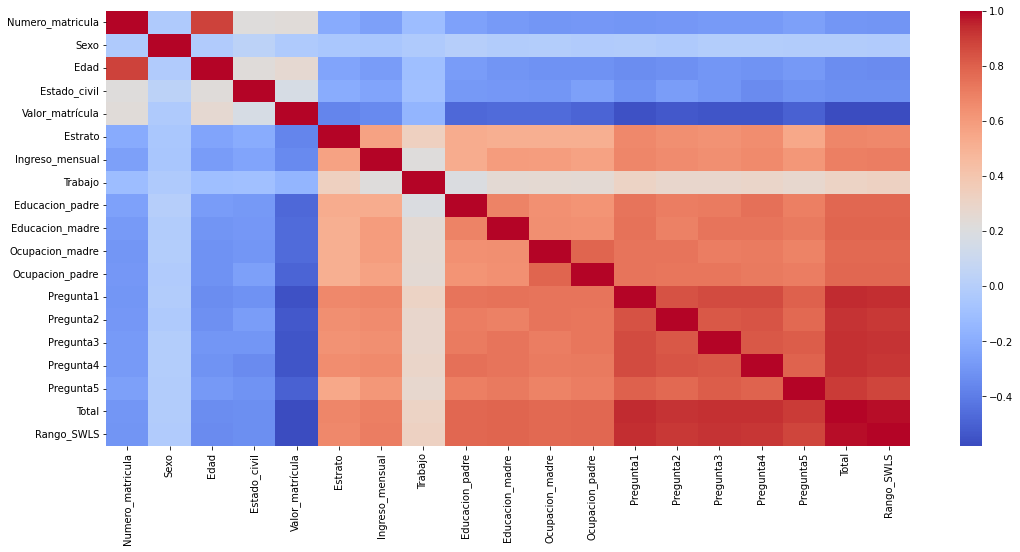

In [35]:
plt.figure(figsize=(18,8)) #Asignamos el tamaño del grafico
sns.heatmap(data_corr,
            xticklabels = data_corr.columns,
            yticklabels = data_corr.columns,
            cmap='coolwarm'
           ) #realizamos nuestro grafico de calor a partir de el paquete seaborn

## Evaluacion de Confiabilidad de la Encuesta
Conceptualmente la fiabilidad refleja hasta qué punto las puntuaciones percibidas por los estudiantes a través de las respuestas están relacionadas con las puntuaciones, esto es, el grado en que las mediciones están libres de la desviación producida por los errores casuales (valores aleatorios). En definitiva, la fiabilidad garantiza que la escala siempre mide lo mismo.

Para la valoracion se toma la muestra de 710 estudiantes y se aplicara el estadístico Alpha de Cronbach. Primero necesitamos garantizar que la encuesta de la SWLS fue optima, asi luego podemos unir las nuevas variables y realizar su respectivo estudio

#### Alpha de Cronbach en SWLS
    1.RESULTADO POR PRIMER PROCEDIMENTO

In [36]:
import numpy as np

In [15]:
def svar(X):
    n = float(len(X))#obtenemos la cantidad de datos
    #obtenemos la variacion de un conjunto unidimensional de datos
    svar=(sum([(x-np.mean(X))**2 for x in X]) / n)* n/(n-1.)
    return svar

def CronbachAlpha2(itemscores):#Los Parametros de entrada son todas las columnas con sus datos
    itemvars = [svar(item) for item in itemscores] #generamos la varianza de cada columna
    tscores = [0] * len(itemscores[0]) #obtenemos el puntaje t a partir de la cantidad de filas
    #el objetivo de tscores es obtener el promedio de tolas las covarianzas entre elementos
    for item in itemscores:
       for i in range(len(item)):
          tscores[i]+= item[i]
    nitems = len(itemscores)
    #print "total scores=", tscores, 'number of items=', nitems 045
    #Formula de alfa de cronbach
    Calpha= (nitems/(nitems-1.) * (1-sum(itemvars)/ svar(tscores)))#-------

    return Calpha

In [37]:
CronbachAlpha2([data_norm['Pregunta1'], data_norm['Pregunta2'], data_norm['Pregunta3'],
                data_norm['Pregunta4'], data_norm['Pregunta5']])

0.9585533764215681

    2.RESULTADO POR SEGUNDO PROCEDIMIENTO (CORRELACIONES)

In [39]:
data_norm_swls = data_norm.drop(['Numero_matricula', 'Sexo', 'Edad', 'Estado_civil', 'Valor_matrícula',
                                 'Estrato','Ingreso_mensual', 'Trabajo','Educacion_padre', 'Educacion_madre', 
                                 'Ocupacion_madre', 'Ocupacion_padre','Total','Rango_SWLS'],
                               axis='columns')
data_norm_swls.head()

,Pregunta1,Pregunta2,Pregunta3,Pregunta4,Pregunta5
0,0.833333,1.000000,0.833333,1.000000,1.000000
1,0.833333,1.000000,0.666667,0.833333,0.666667
2,0.666667,0.833333,1.000000,0.833333,0.833333
3,0.166667,0.333333,0.333333,0.500000,0.166667
4,0.833333,0.833333,1.000000,1.000000,1.000000


In [40]:
N = data_norm_swls.shape[1]#Cantidad de variables utilizadas
data_corr_swls = data_norm_swls.corr(method='pearson')
rs = np.array([])
#sumamos todas las correlaciones del triangulo superior de la matriz de correlaciones
for i, col in enumerate(data_corr_swls.columns): 
    sum_ = data_corr_swls[col][i+1:].values 
    rs = np.append(sum_, rs)
mean_r = np.mean(rs) #Obtenemos el promedio de rs 036
cronbach_alpha = (N*mean_r)/(1+(N-1)* mean_r) #A través de la formula de alfa de cronbach obtenemos el valor
cronbach_alpha

0.9589188506049526

Como se puede observar los resultados obtenidos por los dos distintos procedimientos nos dan similar con un puntaje del 0.958 (95,8%), por ende se concluye que el cuestionario de swls aplicado para los 710 estudiantes fue excelente.

#### Alpha de Cronbach a Cuestionario
    1.RESULTADO POR PRIMER PROCEDIMENTO

In [41]:
CronbachAlpha2([data_norm['Numero_matricula'],data_norm['Sexo'], data_norm['Edad'], data_norm['Estado_civil'],
               data_norm['Valor_matrícula'], data_norm['Estrato'], data_norm['Ingreso_mensual'],
               data_norm['Trabajo'], data_norm['Educacion_padre'], data_norm['Educacion_madre'], 
               data_norm['Ocupacion_madre'], data_norm['Ocupacion_padre'], 
               data_norm['Pregunta1'], data_norm['Pregunta2'], data_norm['Pregunta3'],data_norm['Pregunta4'],
               data_norm['Pregunta5']
               ])

0.7841648686824548

    2. Resultado por segundo procedimiento (Correlaciones)

In [42]:
N = data_norm.shape[1]#Cantidad de variables utilizadas
rs = np.array([])
#sumamos todas las correlaciones del triangulo superior de la matriz de correlaciones
for i, col in enumerate(data_corr.columns): 
    sum_ = data_corr[col][i+1:].values 
    rs = np.append(sum_, rs)
mean_r = np.mean(rs) #Obtenemos el promedio de rs 036
cronbach_alpha = (N*mean_r)/(1+(N-1)* mean_r) #A través de la formula de alfa de cronbach obtenemos el valor
cronbach_alpha#------

0.8688457091370791

Obteniendo un resultado del 0.868 (86,8%) en los dos procedimientos utilizando el alpha de cronbach, se concluye que el cuestionario completo realizado a los 710 estudiantes es muy buena.

# Box-Plot e Intervalo de Confianza

Un Box-Plot ayuda representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el Box-Plot muestra a simple vista la mediana y los cuartiles de los datos, también representando los valores atípicos de estos.

## Intervalo de Confianza
Para generar la prueba Tstudent y ver el el grado de confianza a fin de saber si en las variables se genera alguna varianza y tomar en cuenta dichas variables para el modelo, se toma en cuenta la siguiente formula.

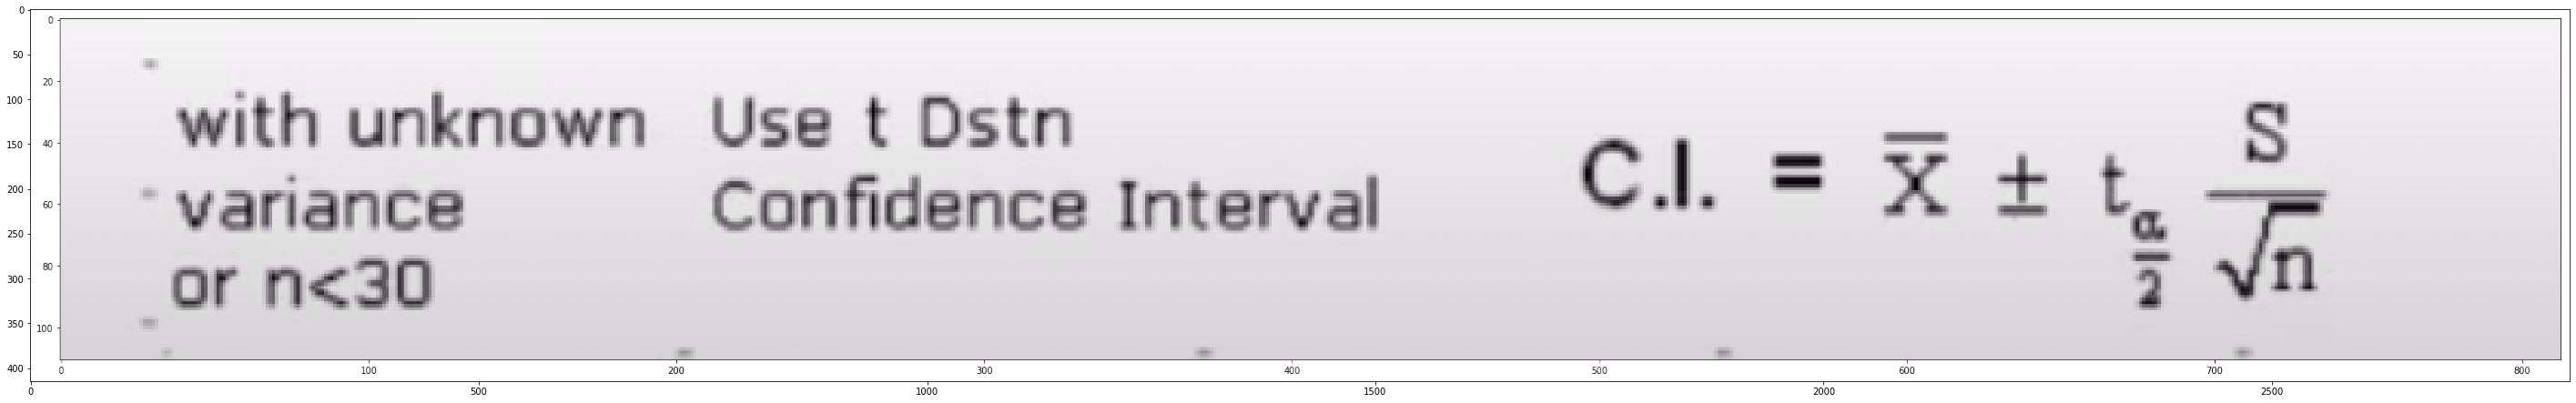

In [43]:
import matplotlib.image as mpimg #importamos la libreria de matplotlib.image para cargar las imagenes de ejemplo
img = mpimg.imread('intervalo_confianza.png')#la variable img obtendra la imagen de entrada
plt.figure(figsize=(50,50))#Asignamos tamaño a la imagen
plt.imshow(img) #Cargamos la imagen a mostrar
plt.show() #Mostramos la imagen de intervalo de confianza

### SWLS segun el sexo
La variable sexo en nuestra tabla de correlacion fue la que menos mostro tendencia respecto a los demas datos, por ende, se le realizara la prueba Tstudent para observar su varianza.

Text(0.5, 1.0, 'SWLS segun el sexo')

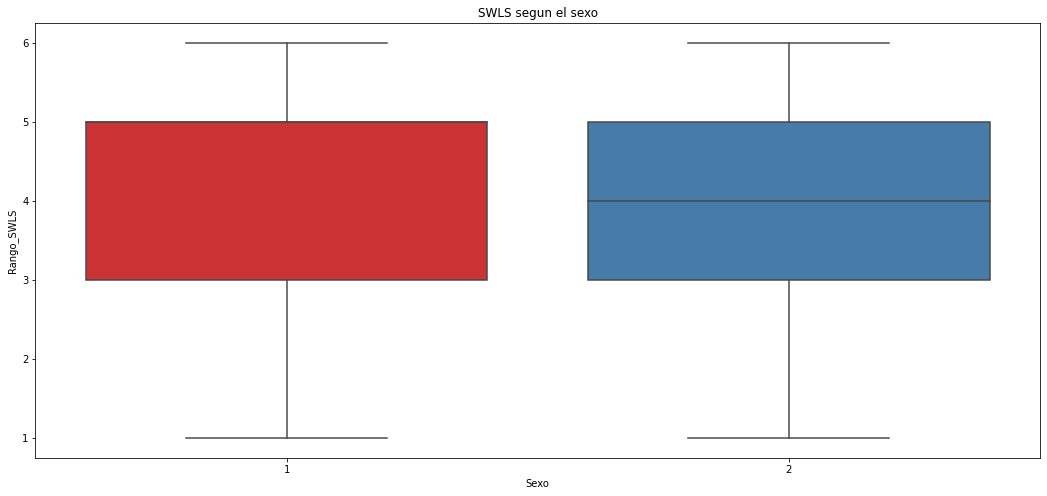

In [44]:
f, ax = plt.subplots(figsize = (18, 8)) #Asignamos el tamaño del grafico
sns.boxplot(x='Sexo', y='Rango_SWLS', data=data, ax=ax, palette='Set1') #generamos un grafico de boxplot
plt.title('SWLS segun el sexo') #le asignamos un titulo al grafico

Se puede observar graficamente que el comportamiento de lo sexos son similares, tanto en sus variaciones como media.

In [49]:
#Generamos los grupos a comparar
df1 = data.Total[data.Sexo == 2] #Mujeres
df2 = data.Total[data.Sexo == 1] #Hombres
#Numero de pruebas para cada categoria en la variable: n
#Promedio de cada categoria en la variable: m
#Variacion estandar de cada categoria en la variable: std 
n1 = len(df1)
n2 = len(df2)
m1 = df1.mean()
m2 = df2.mean()
std1 = df1.std()
std2 = df2.std()

#Nuestra confianza de los datos sera del 0.95 = 95%
confidence = 0.95
#varianza de los datos
h1 = std1 / math.sqrt(n1) * stats.t.ppf((1+confidence)/2, n1 - 1)
h2 = std2 / math.sqrt(n2) * stats.t.ppf((1+confidence)/2, n2 - 1)

#tPRUEBA Y Pvalue
tprueba, pvalue = stats.ttest_ind(df1, df2, equal_var = False)

#IC = INTERVALOS DE CONFIANZA
#Grupos generados
print('1er grupo Femenino')
print('n1: ',n1)
print('m1: ',m1)
print('std1: ',std1)
print('Puntaje Total, IC-Femenino ', m1 - h1, ' - ', m1 + h1) 

print('\n2er grupo Masculino')
print('n2: ',n2)
print('m2: ',m2)
print('std2: ',std2)
print('Puntaje Total, IC-Masculino: ', m2 - h2, ' - ', m2 + h2)

#Si los intervalos se traslapan signfica que no hay mucha variacion en los datos de la variable
#con respecto al resultado, en ese caso se omite la variable para el modelo

print('\nTprueba: ', tprueba)
print('pvalue: ',pvalue)


1er grupo Femenino
n1:  182
m1:  23.78021978021978
std1:  6.186426413902796
Puntaje Total, IC-Femenino  22.87539224301848  -  24.68504731742108

2er grupo Masculino
n2:  527
m2:  24.03605313092979
std2:  6.8432080327636715
Puntaje Total, IC-Masculino:  23.450450551764966  -  24.621655710094615

Tprueba:  -0.4677522629746019
pvalue:  0.6402570165859425


Como el Pvalue obtenido es mayor al 5% (0.05), se acepta la hipotesis nula donde se afirma que los parametros no tienen relacion entre si, por ende, no se debe tomar en cuenta la variable sexo para el modelo.

### SWLS segun el numero de matricula

Text(0.5, 1.0, 'SWLS Numero de Matricula')

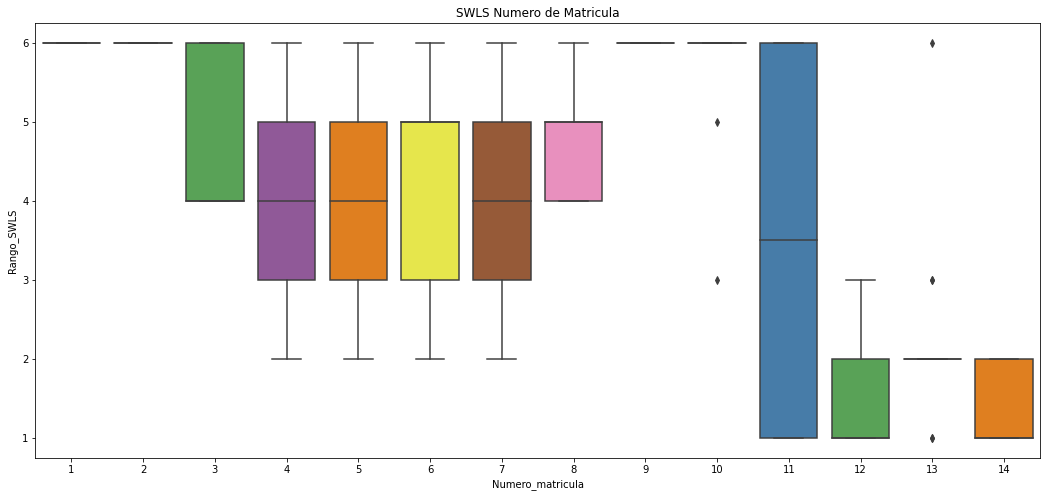

In [51]:
f, ax = plt.subplots(figsize = (18, 8))#Asignamos el tamaño del grafico
sns.boxplot(x='Numero_matricula', y='Rango_SWLS', data=data, ax=ax, palette='Set1') #Generamos un grafico de boxplot
plt.title('SWLS Numero de Matricula') #Asignamos un titulo a nuestro grafico

### SWLS segun el estado civil

Text(0.5, 1.0, 'SWLS Estado Civil')

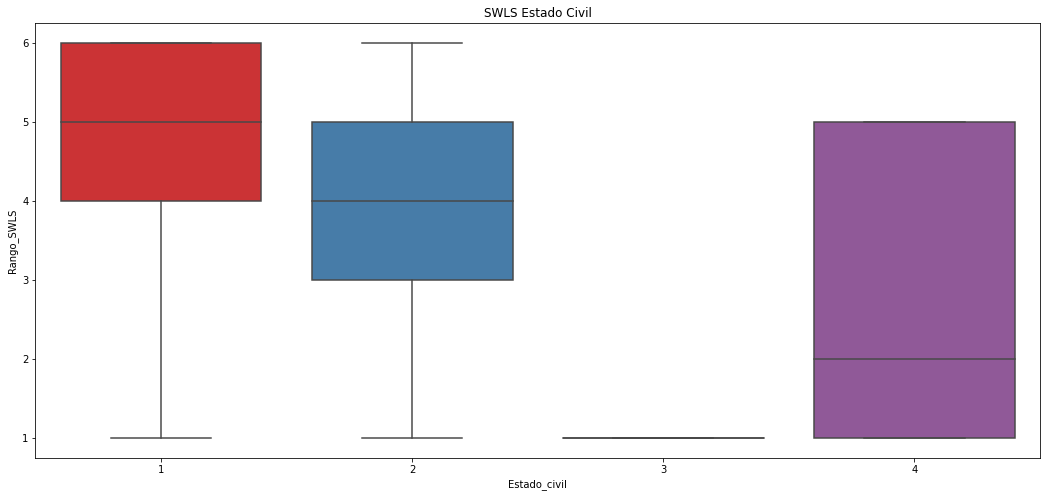

In [53]:
f, ax = plt.subplots(figsize = (18, 8))#Asignamos el tamaño del grafico
sns.boxplot(x='Estado_civil', y='Rango_SWLS', data=data, ax=ax, palette='Set1')#Generamos un grafico de boxplot
plt.title('SWLS Estado Civil')#Asignamos un titulo a nuestro grafico

### SWLS segun el valor de la matricula

Text(0.5, 1.0, 'SWLS Valor Matricula')

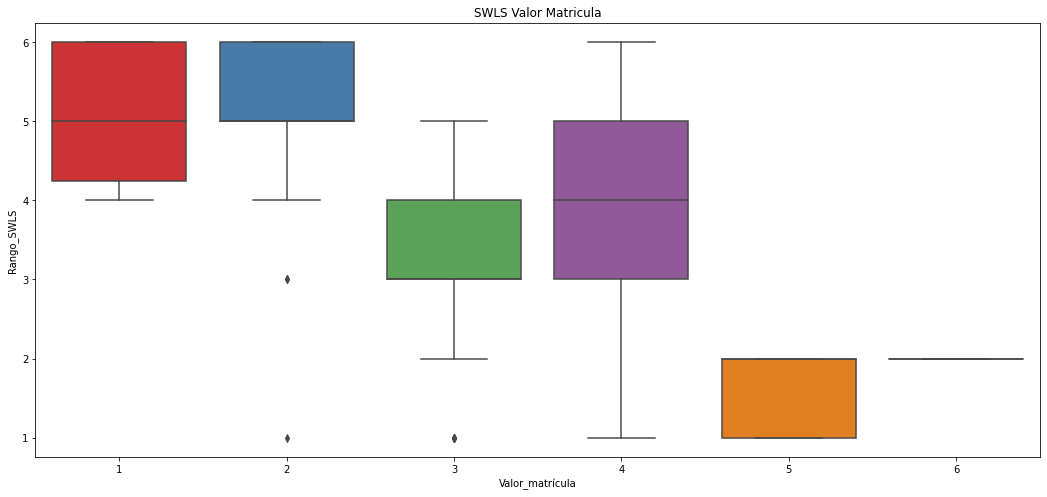

In [55]:
f, ax = plt.subplots(figsize = (18, 8))#Asignamos el tamaño del grafico
sns.boxplot(x='Valor_matrícula', y='Rango_SWLS', data=data, ax=ax, palette='Set1')#Generamos un grafico de boxplot
plt.title('SWLS Valor Matricula')#Asignamos un titulo a nuestro grafico

### SWLS segun estrato e ingreso familiar


Text(0.5, 1.0, 'SWLS Ingreso familiar')

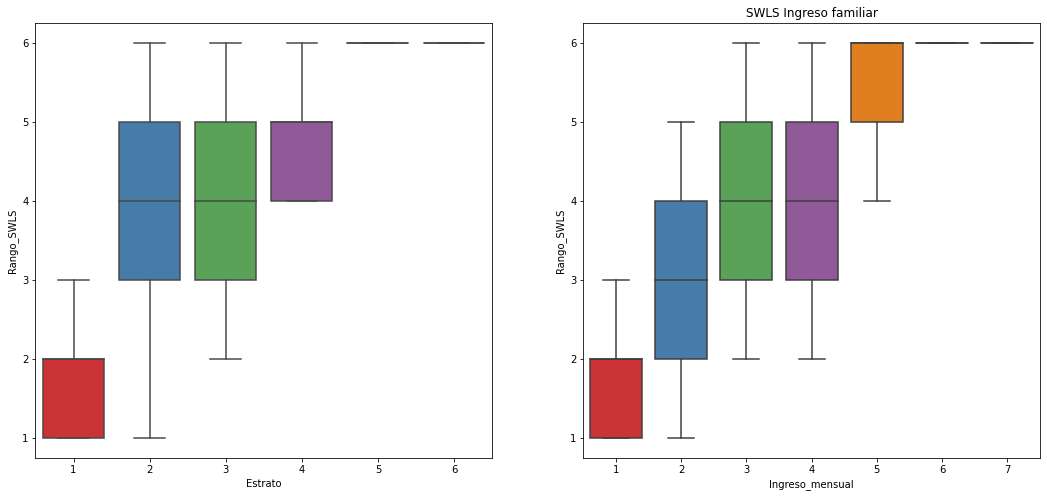

In [56]:
f, ax = plt.subplots(1,2,figsize = (18, 8))#Asignamos el tamaño del grafico
sns.boxplot(x='Estrato', y='Rango_SWLS', data=data, ax=ax[0], palette='Set1')#Generamos un grafico de boxplot para el estrato
plt.title('SWLS Estrato')#Asignamos un titulo a nuestro grafico

sns.boxplot(x='Ingreso_mensual', y='Rango_SWLS', data=data, ax=ax[1], palette='Set1')#Generamos un grafico de boxplot para los ingresos familiares mensuales
plt.title('SWLS Ingreso familiar')#Asignamos un titulo a nuestro grafico

### SWLS segun si el estudiante trabaja

Text(0.5, 1.0, 'SWLS Trabaja actualmente')

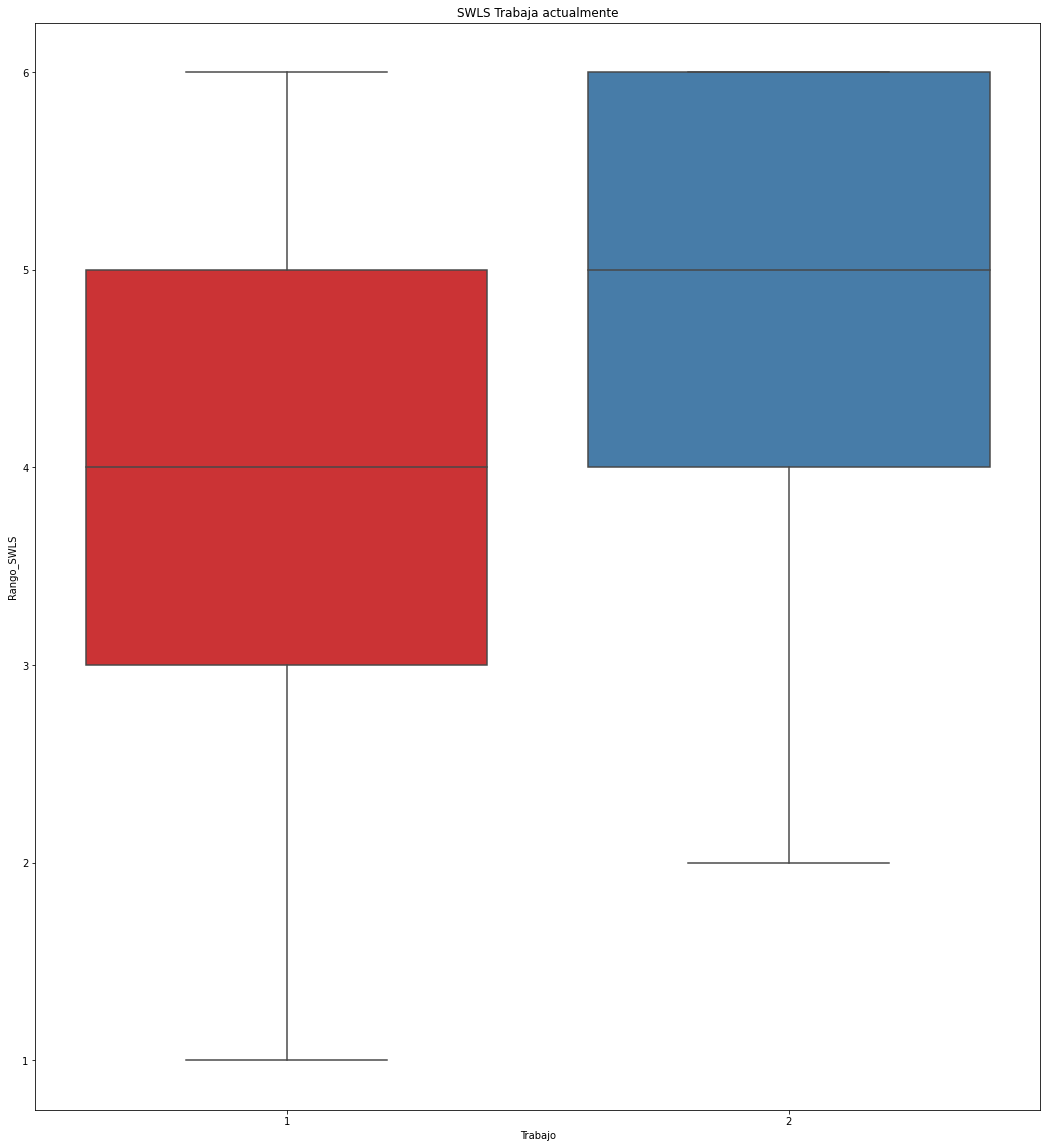

In [63]:
f, ax = plt.subplots(figsize = (18, 20))#Asignamos el tamaño del grafico
sns.boxplot(x='Trabajo', y='Rango_SWLS', data=data, ax=ax, palette='Set1')#Generamos un grafico de boxplot para saber si el estudiante trabaja o no
plt.title('SWLS Trabaja actualmente')#Asignamos un titulo a nuestro grafico

### SWLS segun la educacion y ocupacion de los padres

<AxesSubplot:xlabel='Ocupacion_padre', ylabel='Rango_SWLS'>

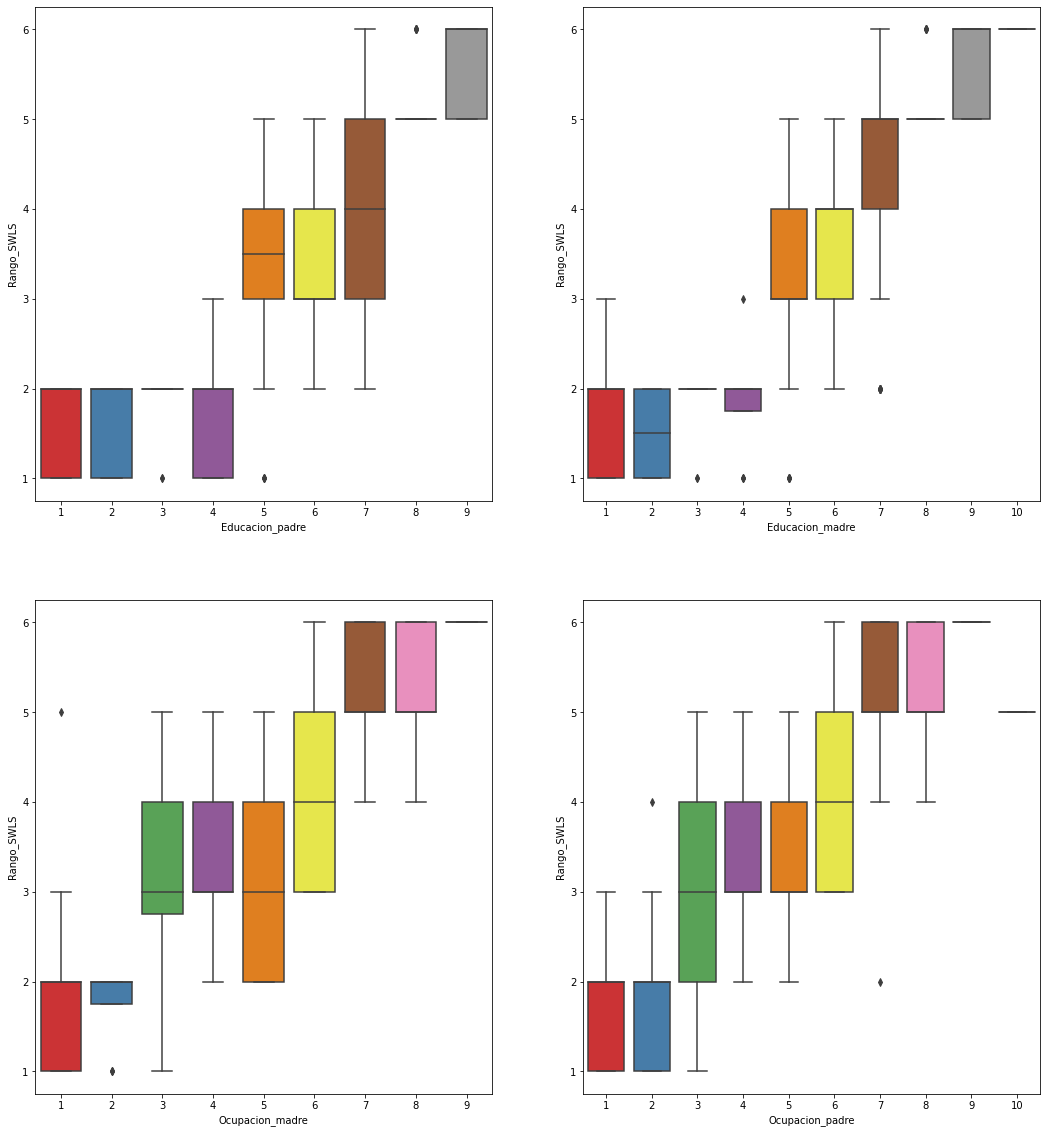

In [64]:
f, ax = plt.subplots(2,2,figsize = (18, 20)) #Asignamos el tamaño del grafico
#Generamos los graficos de boxplot para las variables de educacion y ocupacion de la padre o madre respectivamente
sns.boxplot(x='Educacion_padre', y='Rango_SWLS', data=data, ax=ax[0][0], palette='Set1')
sns.boxplot(x='Educacion_madre', y='Rango_SWLS', data=data, ax=ax[0][1], palette='Set1')
sns.boxplot(x='Ocupacion_madre', y='Rango_SWLS', data=data, ax=ax[1][0], palette='Set1')
sns.boxplot(x='Ocupacion_padre', y='Rango_SWLS', data=data, ax=ax[1][1], palette='Set1')
